In [1]:
import  numpy as np

In [3]:
yThanhHoa = np.load("../csv_data/tri_an_thanh_hoa/y_ThanhHoa_rec.npy")


In [4]:
print(yThanhHoa.shape)

(1223, 34, 42)


In [5]:
y = yThanhHoa[10:]          # các timestamp từ 10 trở đi
has_rain = np.any(y > 0)

print("Từ t=10 trở đi còn mưa không?", has_rain)


Từ t=10 trở đi còn mưa không? True


In [6]:
for t in range(10, yThanhHoa.shape[0]):
    rain_pixels = np.sum(yThanhHoa[t] > 0)
    print(f"t={t}: số pixel mưa = {rain_pixels}")


t=10: số pixel mưa = 13
t=11: số pixel mưa = 6
t=12: số pixel mưa = 0
t=13: số pixel mưa = 0
t=14: số pixel mưa = 0
t=15: số pixel mưa = 0
t=16: số pixel mưa = 0
t=17: số pixel mưa = 0
t=18: số pixel mưa = 0
t=19: số pixel mưa = 0
t=20: số pixel mưa = 0
t=21: số pixel mưa = 0
t=22: số pixel mưa = 0
t=23: số pixel mưa = 0
t=24: số pixel mưa = 0
t=25: số pixel mưa = 0
t=26: số pixel mưa = 0
t=27: số pixel mưa = 0
t=28: số pixel mưa = 0
t=29: số pixel mưa = 0
t=30: số pixel mưa = 0
t=31: số pixel mưa = 0
t=32: số pixel mưa = 0
t=33: số pixel mưa = 0
t=34: số pixel mưa = 0
t=35: số pixel mưa = 0
t=36: số pixel mưa = 14
t=37: số pixel mưa = 226
t=38: số pixel mưa = 57
t=39: số pixel mưa = 16
t=40: số pixel mưa = 8
t=41: số pixel mưa = 0
t=42: số pixel mưa = 0
t=43: số pixel mưa = 0
t=44: số pixel mưa = 0
t=45: số pixel mưa = 0
t=46: số pixel mưa = 69
t=47: số pixel mưa = 65
t=48: số pixel mưa = 0
t=49: số pixel mưa = 0
t=50: số pixel mưa = 0
t=51: số pixel mưa = 0
t=52: số pixel mưa = 0
t=5

TypeError: Colorbar.__init__() got an unexpected keyword argument 'fracqtion'

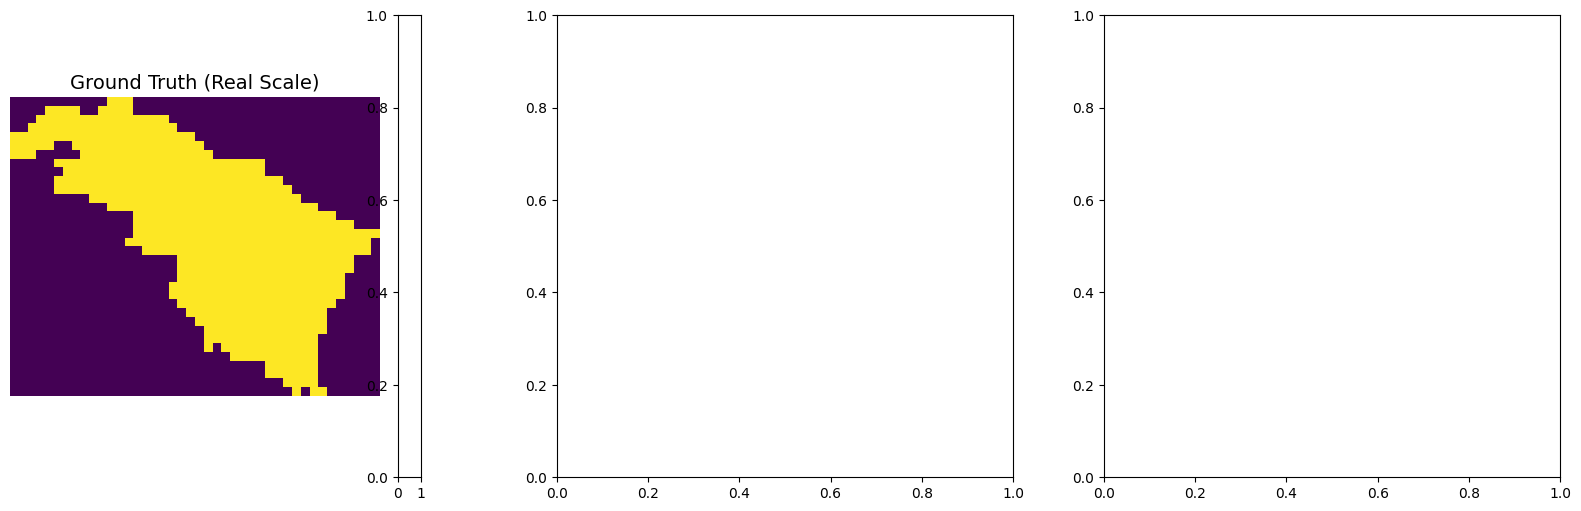

In [12]:
# ==================== FULL MAP VISUALIZATION ====================

import matplotlib.pyplot as plt
import numpy as np
Y = yThanhHoa
# --------- CHỌN SAMPLE ---------
idx = 900   # đổi index nếu muốn xem sample khác

# --------- LẤY MAP (DENORMALIZED) ---------
gt_map = Y[idx]     # (H, W)
pred_map = Y[idx]  # (H, W)

# print(gt_map)

# --------- ÁP MASK (OPTIONAL) ---------
# Các pixel ngoài mask sẽ set = NaN để không hiển thị
gt_vis = gt_map.copy()
pred_vis = pred_map.copy()

# gt_vis[mask != 1] = np.nan
# pred_vis[mask != 1] = np.nan

# --------- VẼ FULL MAP ---------
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# --- Ground Truth ---
im0 = axes[0].imshow(gt_vis, cmap="viridis")
axes[0].set_title("Ground Truth (Real Scale)", fontsize=14)
axes[0].axis("off")
plt.colorbar(im0, ax=axes[0], fracqtion=0.046, pad=0.04)

# --- Prediction ---
im1 = axes[1].imshow(pred_vis, cmap="viridis")
axes[1].set_title("Prediction (Real Scale)", fontsize=14)
axes[1].axis("off")
plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

# --- Absolute Error ---
err_vis = np.abs(pred_vis - gt_vis)
im2 = axes[2].imshow(err_vis, cmap="magma")
axes[2].set_title("Absolute Error", fontsize=14)
axes[2].axis("off")
plt.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

(34, 42)
float64


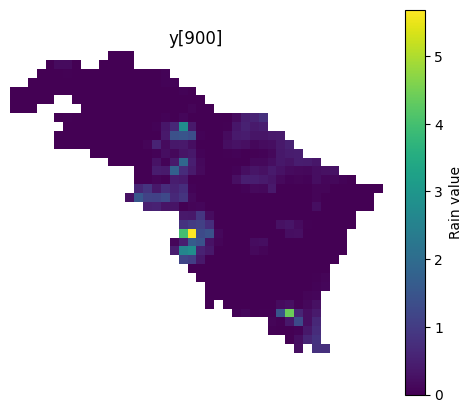

In [11]:
map900 = y[900]   # shape (34, 42)

print(map900.shape)   # phải là (34, 42)
print(map900.dtype)

map900 = map900.astype(float)
map900[map900 == -9999] = np.nan   # nếu có nodata

plt.figure(figsize=(6, 5))
plt.imshow(map900, cmap="viridis")
plt.colorbar(label="Rain value")
plt.title("y[900]")
plt.axis("off")
plt.show()

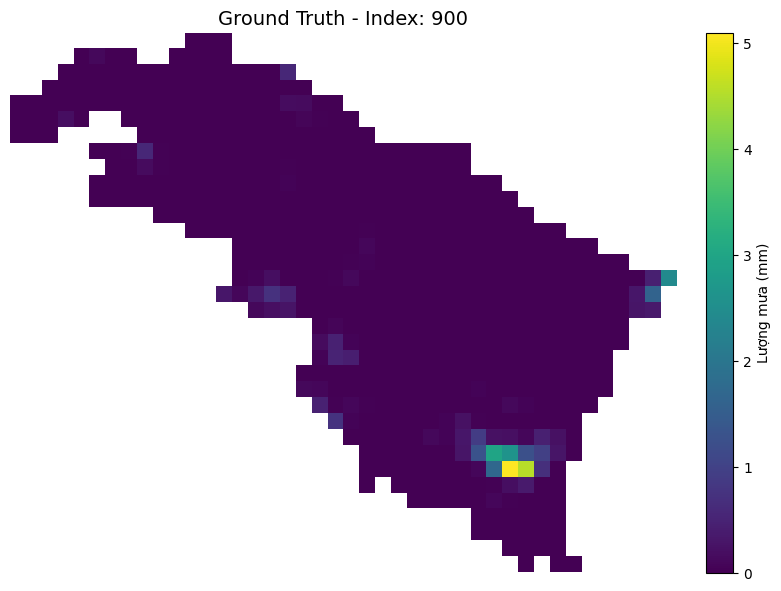

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 1. LOAD DỮ LIỆU
# Thay đổi đường dẫn nếu cần thiết
try:
    y = np.load("../csv_data/tri_an_thanh_hoa/y_ThanhHoa_rec.npy")
except FileNotFoundError:
    print("Không tìm thấy file, đang tạo dữ liệu giả lập để chạy demo.")
    y = np.random.rand(1000, 34, 42) * 50 # Giả lập

# 2. CHỌN SAMPLE VÀ XỬ LÝ
idx = 900
gt_map = y[idx].astype(float)  # (H, W)

# --- QUAN TRỌNG: Lọc nhiễu (Logic từ code thứ 2) ---
# Nếu không có dòng này, giá trị -9999 sẽ làm hỏng thang màu
gt_map[gt_map == -9999] = np.nan

# 3. VẼ HÌNH (Logic hiển thị từ code cũ)
plt.figure(figsize=(8, 6)) # Kích thước vừa phải cho 1 hình

# Xử lý màu cho giá trị NaN (để nó hiện màu trắng thay vì màu của giá trị thấp nhất)
current_cmap = plt.cm.viridis
current_cmap.set_bad(color='white')

# Vẽ
im = plt.imshow(gt_map, cmap=current_cmap)
plt.title(f"Ground Truth - Index: {idx}", fontsize=14)
plt.axis("off") # Tắt trục tọa độ cho đẹp

# Thanh màu (Colorbar)
plt.colorbar(im, label="Lượng mưa (mm)", fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()